In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
%matplotlib inline

In [9]:
filepath = 'C:/Users/LiangRui/Desktop/dataset exploratory analysis/data/adult.csv'
df = pd.read_csv(filepath)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [17]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [18]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [20]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [10]:
cols_df = pd.DataFrame(df.dtypes)
num_cols = list(cols_df[cols_df[0]=='int64'].index)
cat_cols = list(cols_df[cols_df[0]=='object'].index)[:-1] #excluding target column of income 
print('Numeric variables includes:','\n',num_cols)
print('\n')
print('Categorical variables includes','\n',cat_cols) 

Numeric variables includes: 
 ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']


Categorical variables includes 
 ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']


In [23]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [24]:
for i in list(df.columns):
    print(i,df[df[i]=='?'][i].count())

age 0
workclass 1836
fnlwgt 0
education 0
education.num 0
marital.status 0
occupation 1843
relationship 0
race 0
sex 0
capital.gain 0
capital.loss 0
hours.per.week 0
native.country 583
income 0


C:\Users\LiangRui\Miniconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [25]:
df.replace(to_replace='?',value=np.nan,inplace=True)

In [26]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [27]:
df.dropna(axis=0,inplace=True)

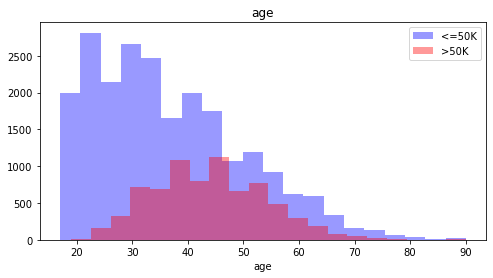

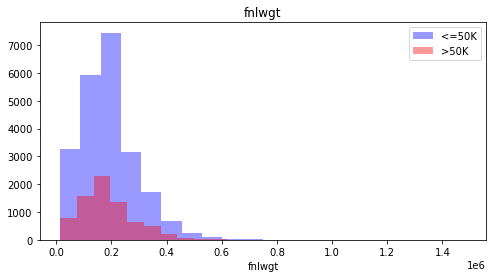

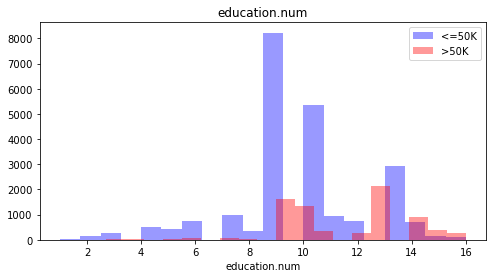

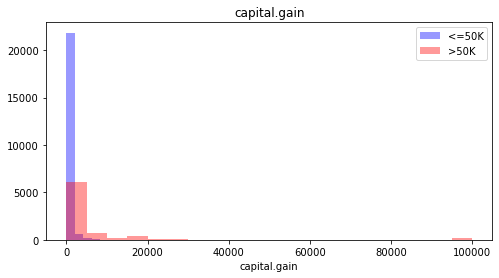

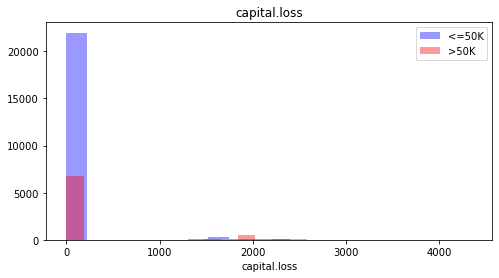

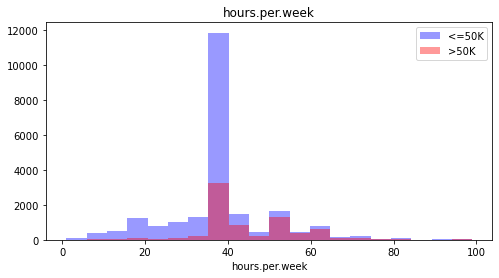

In [78]:
for i in num_cols:
    fig = plt.figure(figsize=(8,4))
    sns.distplot(df[df['income']=='<=50K'][i], bins=20, kde=False, color='b',label='<=50K')
    sns.distplot(df[df['income']=='>50K'][i], bins=20, kde=False, color='r', label='>50K')
    plt.title(i)
    plt.legend()
    plt.show()
    fig.savefig("{i}.png".format(i=i))
    plt.close()

<Figure size 576x288 with 0 Axes>

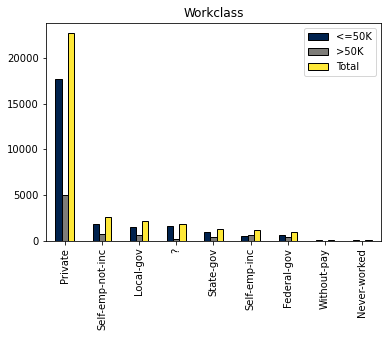

<Figure size 576x288 with 0 Axes>

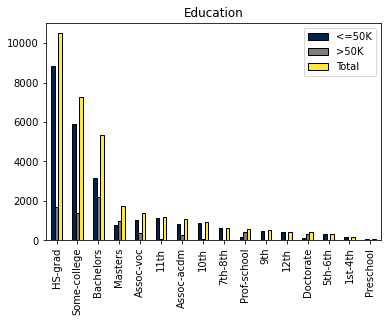

<Figure size 576x288 with 0 Axes>

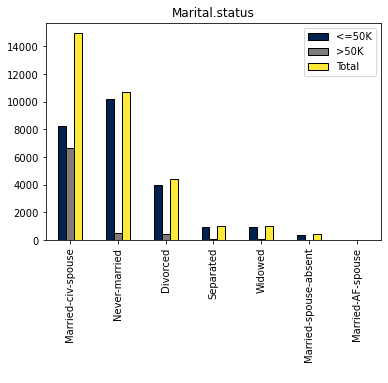

<Figure size 576x288 with 0 Axes>

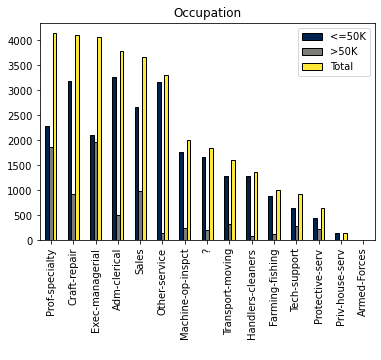

<Figure size 576x288 with 0 Axes>

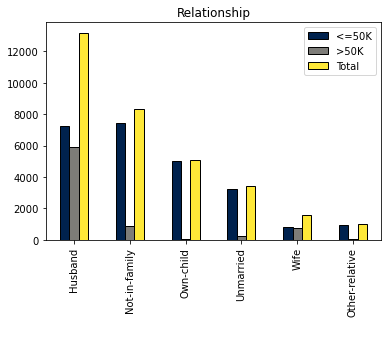

<Figure size 576x288 with 0 Axes>

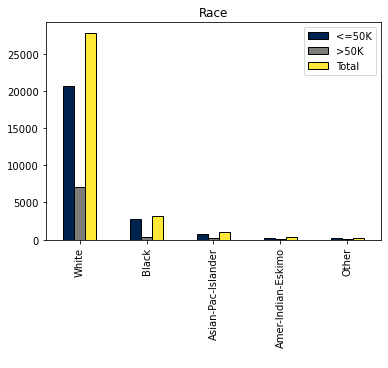

<Figure size 576x288 with 0 Axes>

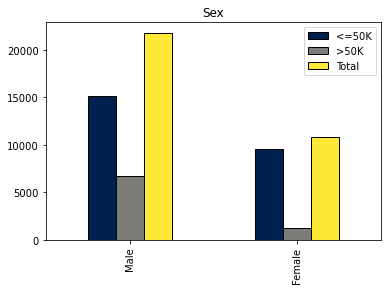

<Figure size 576x288 with 0 Axes>

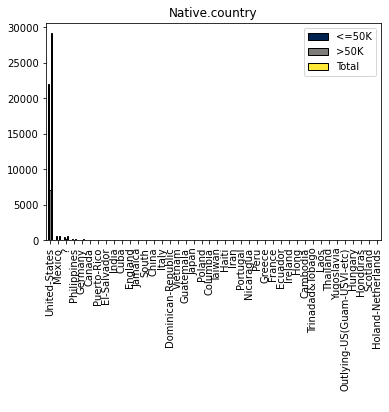

In [25]:
# use the below loop to create a cross tab 

for i in cat_cols:
    ct = pd.crosstab(df[i],df['income'],margins=True, margins_name="Total")
    ct.drop(labels='Total',axis=0,inplace=True) #Removing subtotal row 
    ct.sort_values(by='Total',ascending=False,inplace=True) #Sorting based on total column
    # plotting
    fig1 = plt.figure(figsize=(8,4))
    ct.plot(kind='bar',colormap='cividis',edgecolor='black')  
    plt.xlabel(' ')
    plt.title(str(i).capitalize())
    plt.legend(loc=1)
    plt.show()

In [50]:
df['race'].value_counts(normalize=True)*100

White                 85.979046
Black                  9.339566
Asian-Pac-Islander     2.967310
Amer-Indian-Eskimo     0.948213
Other                  0.765864
Name: race, dtype: float64

In [52]:
df['sex'].value_counts(normalize=True)*100

Male      67.568464
Female    32.431536
Name: sex, dtype: float64

In [56]:
sex_dist = df['sex'].value_counts(normalize=True)*100

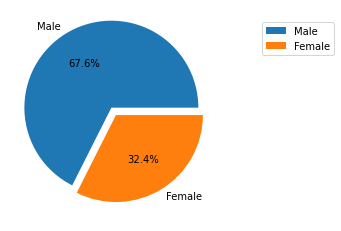

In [80]:
plt.pie(sex_dist,explode=(0.1, 0) ,labels=['Male', 'Female'],autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.15, .95))

In [60]:
race_dist = df['race'].value_counts(normalize=True)*100

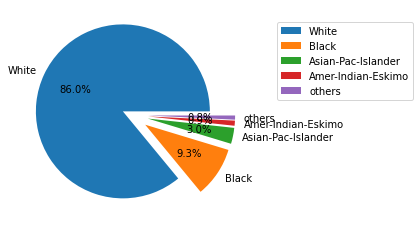

In [83]:
plt.pie(race_dist,explode=(0.1,0.2,0.2,0.2,0.2), labels=['White', 'Black', 'Asian-Pac-Islander','Amer-Indian-Eskimo','others'],autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.15, .95))

In [84]:
# representing categorical freature with number, by creating new col

df['workclass_num'] = df.workclass.map({'Private':0, 'State-gov':1, 'Federal-gov':2, 'Self-emp-not-inc':3, 'Self-emp-inc':4, 'Local-gov':5, 'Without-pay':6})
df['over50K'] = np.where(df.income == '<=50K', 0, 1)
df['marital_num'] = df['marital.status'].map({'Widowed':0, 'Divorced':1, 'Separated':2, 'Never-married':3, 'Married-civ-spouse':4, 'Married-AF-spouse':4, 'Married-spouse-absent':5})
df['race_num'] = df.race.map({'White':0, 'Black':1, 'Asian-Pac-Islander':2, 'Amer-Indian-Eskimo':3, 'Other':4})
df['sex_num'] = np.where(df.sex == 'Female', 0, 1)
df['rel_num'] = df.relationship.map({'Not-in-family':0, 'Unmarried':0, 'Own-child':0, 'Other-relative':0, 'Husband':1, 'Wife':1})

In [85]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,...,capital.loss,hours.per.week,native.country,income,workclass_num,over50K,marital_num,race_num,sex_num,rel_num
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,...,4356,18,United-States,<=50K,0,0,0,0,0,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,...,3900,40,United-States,<=50K,0,0,1,0,0,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,...,3900,40,United-States,<=50K,0,0,2,0,0,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,...,3770,45,United-States,<=50K,0,0,1,0,0,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,...,3770,40,United-States,<=50K,0,0,2,0,1,0
